# Great Lakes and the Grand River
\* Based off a CMSE 201 assignment

Were going to use Pandas or Numpy and Matplotlib to interact with some data that pertains to the water levels of the [Great Lakes](https://en.wikipedia.org/wiki/Great_Lakes) and the [discharge](https://en.wikipedia.org/wiki/Discharge_(hydrology)) of the [Grand River](https://en.wikipedia.org/wiki/Grand_River_(Michigan)).
![picture](https://upload.wikimedia.org/wikipedia/commons/5/57/Great_Lakes_from_space_crop_labeled.jpg)

---
# Great Lakes

In [ ]:
# Bring in NumPy, Pandas, and Matplotlib, should be all you need to plot. 
# IF you need more make sure to notify your group.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

To use this notebook for your in-class assignment, you will need these files, which are available as part of the GitHub repository. They live in the "data" folder:
* `mhu.csv` -- [Lake Michigan](https://en.wikipedia.org/wiki/Lake_Michigan) and [Lake Huron](https://en.wikipedia.org/wiki/Lake_Huron)
* `sup.csv` -- [Lake Superior](https://en.wikipedia.org/wiki/Lake_Superior)
* `eri.csv` -- [Lake Erie](https://en.wikipedia.org/wiki/Lake_Erie)
* `ont.csv` -- [Lake Ontario](https://en.wikipedia.org/wiki/Lake_Ontario)

This notebook **might look very familiar!** It is based off a CMSE 201 assignment that focused on exploring some [Great Lakes](https://en.wikipedia.org/wiki/Great_Lakes) water level data. We will be doing similar calculations with the same data to get some practice with version contol while your remind yourself of your Python skills. Make sure you **try to complete this activity without looking at the old notebook**. The old notebook came up in 201 right after you first learned how to use Matplotlib and as you began to learn about NumPy. This is good moment to reflect on how far you have come.

**As instructed in the in-class activity notebook for today, you are only expected to complete one "PART" below. Do not worry if your group is not big enough to finish all parts below, but if you have extra time, you're welcome to do so.**

# PART 1

**Using the Michigan/Huron Dataset, plot the Water Level, the second column, as a function of time [years]**

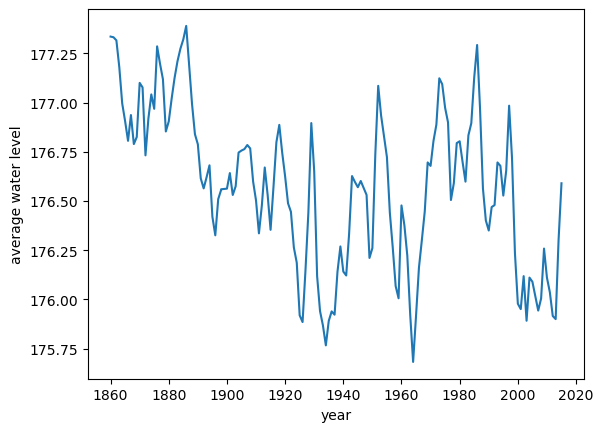

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/mhu.csv')

plt.plot(df['Michigan-Huron annual averages'], df['AnnAvg'])
plt.xlabel('year')
plt.ylabel('average water level')
plt.show()

# PART 2

**Using the Superior Dataset, plot the Water Level, the second column, as a function of time [years]**

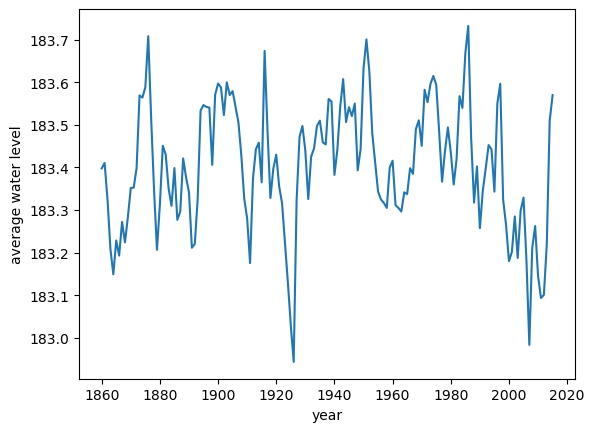

# PART 3

**Using the Erie Dataset, plot the Water Level, the second column, as a function of time [years]**

In [ ]:
df = pd.read_csv('data/eri.csv') 


df = df.rename(columns={
    'Lake Erie annual averages': 'Year',
    'Unnamed: 1': 'Water Level'
})

# Clean and convert columns
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Water Level'] = pd.to_numeric(df['Water Level'], errors='coerce')
df_cleaned = df.dropna(subset=['Year', 'Water Level'])

# Plot Water Level vs. Year
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Year'], df_cleaned['Water Level'])
plt.xlabel('Year')
plt.ylabel('Water Level (meters)')
plt.title('Lake Erie Water Level Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

# PART 4

**Using the Ontario Dataset, plot the Water Level, the second column, as a function of time [years]**

In [ ]:
# Insert Code Here

# PART 5

**Using the Michigan/Huron and Superior Datasets, plot the Michigan/Hurion Water Level vs Superior Water Level to see if there is any correlation between the water levels.**

In [ ]:
# Insert Code Here

# PART 6

**Using the Michigan/Hurion and Erie Datasets, plot the Michigan/Huron Water Level vs Erie Water Level to see if there is any correlation between the water levels.**

In [ ]:
# Insert Code Here

# PART 7

**Using the Superior and Ontario Datasets, plot the Superior Water Level vs Ontario Water Level to see if there is any correlation between the water levels.**

In [ ]:
# Insert Code Here

# PART 8

**Using the Erie and Ontario Datasets, plot the Erie Water Level vs Ontario Water Level to see if there is any correlation between the water levels.**

In [ ]:
# Insert Code Here

---
### &#128721; STOP 
The next section is for the **Exploring the version history and moving between versions** section of today's in-class activity.

---

# Grand River
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/75/Grand_River_%28Michigan%29_map.svg/800px-Grand_River_%28Michigan%29_map.svg.png">

The [Grand River](https://en.wikipedia.org/wiki/Grand_River_(Michigan)) is an important landmark in [Southern Michigan](https://en.wikipedia.org/wiki/Southern_Michigan). It is the longest river in Michigan at 252 miles (406 km) and it runs through many of the noteable cities in [Southern Michigan](https://en.wikipedia.org/wiki/Southern_Michigan), including [Lansing](https://en.wikipedia.org/wiki/Lansing,_Michigan). "Grand River" is also the name of a major road way, also known as [U.S. Route 16](https://en.wikipedia.org/wiki/U.S._Route_16_in_Michigan), that stretches from the rivers end point at [Lake Michigan](https://en.wikipedia.org/wiki/Lake_Michigan) in [Grand Haven](https://en.wikipedia.org/wiki/Grand_Haven,_Michigan) to [Detroit](https://en.wikipedia.org/wiki/Detroit). The river is one of the three major [tributaries](https://en.wikipedia.org/wiki/Tributary) of Lake Michigan.

Using data on the [discharge](https://en.wikipedia.org/wiki/Discharge_(hydrology)) of the [Grand River](https://en.wikipedia.org/wiki/Grand_River_(Michigan)) and water level of [Lake Michigan](https://en.wikipedia.org/wiki/Lake_Michigan)/[Lake Huron](https://en.wikipedia.org/wiki/Lake_Huron), we will see if there is any correlation between the two.

In [ ]:
#Importing Seaborn for regplot
import seaborn as sns

#loading in Data for Grand River from riverdata.com
import urllib.request
print('Beginning file download with urllib2...')
url = 'http://riverdata.com/grand.csv'
urllib.request.urlretrieve(url, './data/grand.csv')
grand = pd.read_csv("./data/grand.csv")

#Loading in Data for mhu.csv
mhu = pd.read_csv("./data/mhu.csv")
mhu = mhu[mhu["Michigan-Huron annual averages"] >= 1935]
grand = grand[grand["Calendar Year"] <= 2015]
grand = grand[grand["Calendar Year"] >= 1935]

# Setting Size of Figures
plt.figure(figsize=(7,10))

# Plotting Discharge versus time
plt.subplot(2,1,1)
plt.scatter(grand["Calendar Year"],grand["Discharge (ft^3/s)"])
plt.xlabel("Calendar Years")
plt.ylabel("Discharge (ft^3/s)")
plt.title("Grand River Discharge over Time")

#Plotting Grand River Discharge versus Lake Michigan/Huron Water Level (Normalized)
ax2 = plt.subplot(2,1,2)
sns.regplot(grand["Discharge (ft^3/s)"],mhu["AnnAvg"],ax=ax2)
plt.xlabel("Grand River Discharge (ft^3/s)")
plt.ylabel("Lake Michigan/Huron Water Level")
plt.title("Grand River Discharge vs Lake Michigan/Huron Water Level")
plt.tight_layout()

&#169; Copyright 2020,  Michigan State University Board of Trustees.